# Lab 8: Define and Solve an ML Problem of Your Choosing

In [6]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [7]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I chose the book review data set. I will be predicting whether or not a review is helpful. The label is the helpfulness of the review. This is a supervised learning problem, and its a binary classification type. Some features are length of review, objective vs subjective statements, use of keywords, and checking if the review includes a plot summary.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1973 non-null   object
 1   Positive Review  1973 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 17.5+ KB
None

Sample data:
                                              Review  Positive Review
0  This was perhaps the best of Johannes Steinhof...             True
1  This very fascinating book is a story written ...             True
2  The four tales in this collection are beautifu...             True
3  The book contained more profanity than I expec...            False
4  We have now entered a second time of deep conc...             True

Missing values:
Review             0
Positive Review    0
dtype: int64

Distribution of reviews:
False    0.503294
True     0.496706
Name: Positive Review, dtype: float64


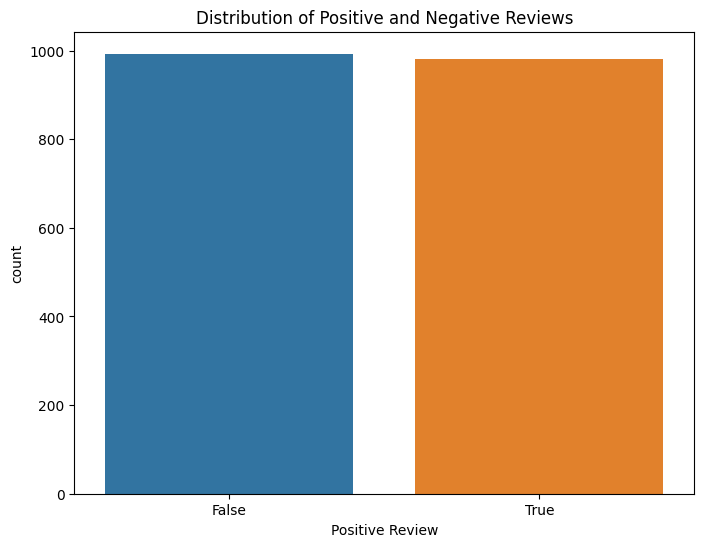

In [9]:
print(df.info())
print("\nSample data:")
print(df.head())

print("\nMissing values:")
print(df.isnull().sum())

print("\nDistribution of reviews:")
print(df['Positive Review'].value_counts(normalize=True))

plt.figure(figsize=(8, 6))
sns.countplot(x='Positive Review', data=df)
plt.title('Distribution of Positive and Negative Reviews')
plt.show()

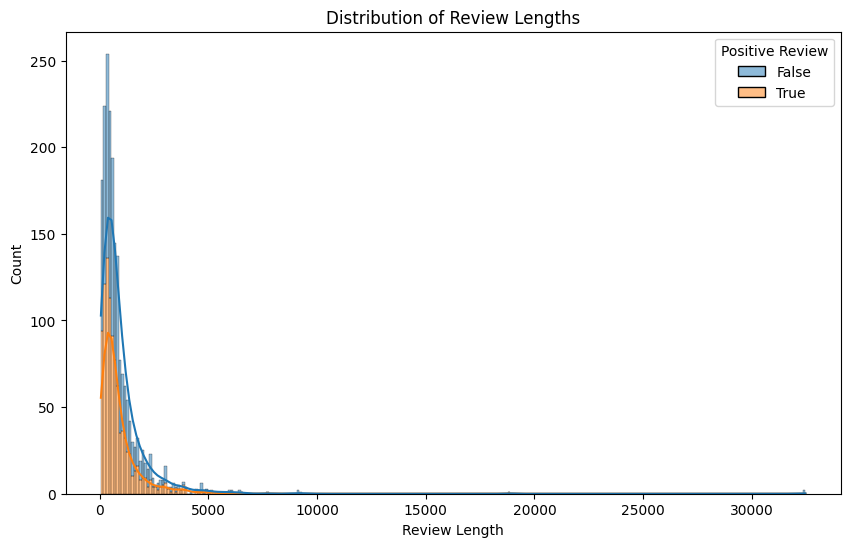

In [10]:
df['review_length'] = df['Review'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', hue='Positive Review', kde=True, multiple='stack')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.show()

In [11]:
print("\nReview length statistics:")
print(df.groupby('Positive Review')['review_length'].describe())

print("\nSample positive review:")
print(df[df['Positive Review'] == True]['Review'].iloc[0])

print("\nSample negative review:")
print(df[df['Positive Review'] == False]['Review'].iloc[0])


Review length statistics:
                 count         mean          std   min    25%    50%     75%  \
Positive Review                                                                
False            993.0  1005.938570  1751.141552  59.0  349.0  617.0  1149.0   
True             980.0   859.770408  1057.440139  64.0  314.5  553.5  1002.5   

                     max  
Positive Review           
False            32467.0  
True             18865.0  

Sample positive review:
This was perhaps the best of Johannes Steinhoff's books, since it does not  deal with his own stellar yet tragic WW II and post war career. The  insights of the average person living in Germany are of great importance to  both social and military historians alike. Steinhoff offered this  collective testament as a warning to all of us regarding war and the rise  of a dictator. As Johannes said in an interview, &quot;It is always the  civilians who suffer the most, yet are remembered the least.&quot


Sample negativ

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

The features I added are: review length, sentiment score, and keyword presence, and the existing 'Review' text and 'Positive Review' label. I'll repare the data through text preprocessing steps including lowercase conversion, punctuation removal, and TFIDF vectorization. My four models are: Logistic Regression, Naive Bayes, Support Vector Machine, and Random Forest. The data will be split into training, validation, and test sets. I'll evaluate models by using metrics like accuracy, precision, recall, and F1-score. At the end, I'll fine-tune the best-performing model, analyze its behavior using confusion matrices and feature importance, and iterate on my approach if needed.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [12]:
!pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [13]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import re

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [15]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    return text

df['processed_review'] = df['Review'].apply(preprocess_text)

df['word_count'] = df['processed_review'].str.split().str.len()

tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['processed_review'])

X = np.hstack((tfidf_matrix.toarray(), df[['review_length', 'word_count']].values))
y = df['Positive Review'].values

print("Shape of feature matrix:", X.shape)
print("Number of positive reviews:", sum(y))
print("Number of negative reviews:", len(y) - sum(y))

Shape of feature matrix: (1973, 5002)
Number of positive reviews: 980
Number of negative reviews: 993


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1578, 5002)
Test set shape: (395, 5002)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

Training Logistic Regression...


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.8228, Precision: 0.8250, Recall: 0.8250, F1: 0.8250
Training Naive Bayes...
Naive Bayes - Accuracy: 0.7519, Precision: 0.9250, Recall: 0.5550, F1: 0.6937
Training SVM...
SVM - Accuracy: 0.5291, Precision: 0.5427, Recall: 0.4450, F1: 0.4890
Training Random Forest...
Random Forest - Accuracy: 0.7924, Precision: 0.8278, Recall: 0.7450, F1: 0.7842


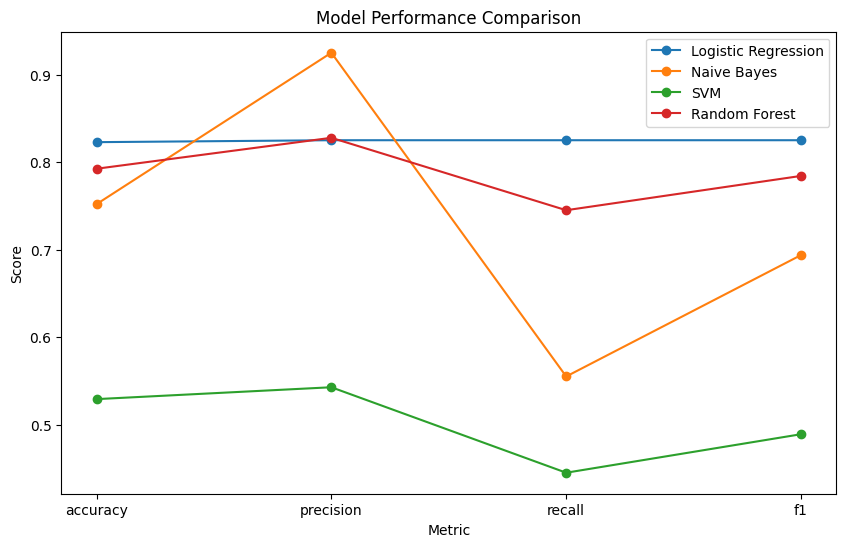

In [18]:
plt.figure(figsize=(10, 6))
metrics = ['accuracy', 'precision', 'recall', 'f1']
for name in models.keys():
    plt.plot(metrics, [results[name][m] for m in metrics], marker='o', label=name)

plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV

best_model = max(results, key=lambda x: results[x]['f1'])
print(f"Best model: {best_model}")

if best_model == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2']
    }
    model = LogisticRegression(random_state=42)
elif best_model == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    model = RandomForestClassifier(random_state=42)
elif best_model == 'SVM':
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear']
    }
    model = SVC(random_state=42)
else:
    param_grid = {
        'alpha': [0.1, 0.5, 1.0]
    }
    model = MultinomialNB()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best model: Logistic Regression


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Best parameters: {'C': 10, 'penalty': 'l2'}
Best cross-validation score: 0.8102998498948585


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Final model - Accuracy: 0.8127, Precision: 0.8182, Recall: 0.8100, F1: 0.8141


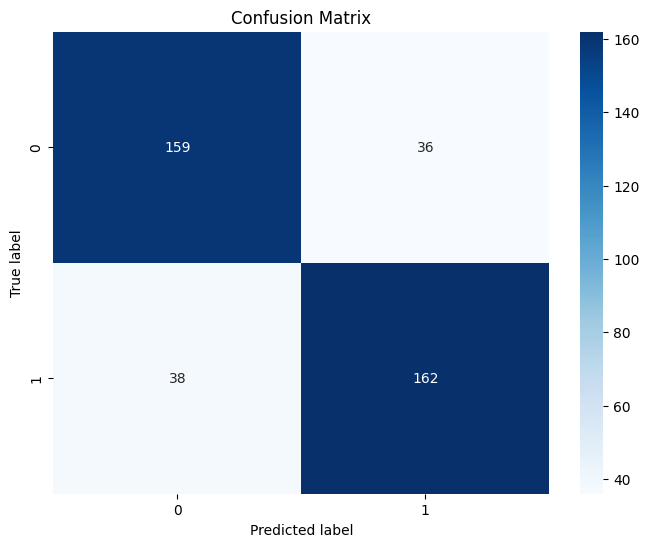

In [20]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Final model - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
import random

random_review = df['Review'].iloc[random.randint(0, len(df) - 1)]

processed_review = preprocess_text(random_review)

review_tfidf = tfidf.transform([processed_review])

review_length = len(random_review)
word_count = len(processed_review.split())

review_features = np.hstack((review_tfidf.toarray(), [[review_length, word_count]]))

prediction = best_model.predict(review_features)
probability = best_model.predict_proba(review_features)[0]

print("Random Review:")
print(random_review)
print("\nPrediction:")
print("Helpful" if prediction[0] else "Not Helpful")
print(f"Probability of being helpful: {probability[1]:.2f}")
print(f"Probability of not being helpful: {probability[0]:.2f}")

Random Review:
This book was great.  It read well and never was too slow.  It was fair to both sides of the war and the leaders who fought the battles and planned the campaign.  It was complete in that it discussed the men, tactics, weapons, and terrain in the southern campaign.  Not only was this book a great souce for the southern war but it also gave good insight into the revolutionary war in general.  If you're interested in this topic and want to increase you're knowledge of the southern war, get this book.  It's informative as well as pleasing to read


Prediction:
Helpful
Probability of being helpful: 0.97
Probability of not being helpful: 0.03


I think it's worth mentioning that my model is not the most accurate. This may be the cause of the limited amount of training data. The data set doesn't encapture everything that goes into making a review helpful. Also, there's a lot of subjectivity in what is considered helpful, so I tried to be as 